---
<div style="text-align: center;" >
    <h1>
        <b>データサイエンスプログラミング演習</b>
    </h1>
    <h3>
        第7,　8回授業ノート
    </h3>
</div>
<div style="text-align: right">
    1922076<br/>
    南昂汰
</div>

---

## **前回（2019/10/1）の復習**
### **Pandas**
>　**Pandas** はPythonで表形式のデータを扱うためのパッケージである。表や時系列データの扱いを得意とし、主にデータの加工・集計に用いる。単純なデータ集計であれば **Pandas** の機能だけで十分完結できるほど、多くの機能を備えている。</br>
　データを取得・収集できたとしても、扱いやすい形式に変換できなければ分析を始めることはできない。具体的には、データの重複や誤記、表記の揺れなどを探し出し、削除や修正、正規化などを行い、データの品質を高める＝ **データクレンジング** を行う必要がある。 **Pandas** を覚え、データを自由自在に加工できるようになると、円滑にデータ分析を行うことができる。

- ### **データ分析プロセスのフレームワーク**
|KDD|CRISP-DM|SEMMA|
|:---:|:---:|:---:|
| |ビジネス課題の理解|
|データ取得|データ取得と理解|データ取得|
|前処理|データ取得と理解|データ理解|
|前処理|データ準備|データ加工|
|データ加工|データ準備|データ加工|
|データマイニング|モデリング|モデリング|
|解釈と評価|評価|評価と施策の実行
| |施策の実行|評価と施策の実行

- KDD:Knowledge Discovery in Database (Fayyad, 1996)
- <b>CRISP-DM:Cross Industry Standard Process for Data Mining (Chapman, p.et al, 2000)</b>
- SEMMA:Sample, Explore, Modify, Model and Assess (SAS Enterprise Minir, 2008)

> **ビジネス理解** 
- 顧客がどのようなビジネスを行なっていて、何を求めているのかをヒアリングを通じて把握。例：「データから〇〇が分かる（できる）ようになったら嬉しいですか？」という風に探っていってニーズを引き出す。

> **データ取得と理解**
- 顧客からデータを受け取り、中身を確認。データの信頼性（欠損値や外れ値がどのくらいあるか）をチェックしたり、集計や可視化など行う。

> **データ準備：**
- 詳細な分析、モデリングを行うための準備。欠損値や外れ値を除去したり、文字列を対応する数値に置き換えたりする。また数値を標準化し、複数のファイルを統合し変数を抽出する作業などを行う。

---
#### **セル操作**
- escボタンを押し、Modeを `Edit` → `Command` にしたら、セルの操作を行うことができる
    - a:現在のセルの上に新たにセルを挿入
    - b:現在のセルの下に新しいセルを挿入
    - dd:現在のセルを削除
    - x:現在のセルをカット
    - c:現在のセルをコピー
    - v:コピーまたはカットしたセルを現在のセルの下に貼り付け
    - z:セル操作を元に戻す=Undo(Redo=shift+z)

---
### **DataFrameによるデータ操作**

#### **1. CSVファイルの読み込み、先頭部分だけを表示する方法**

In [91]:
import pandas as pd

df=pd.read_csv("temp.csv",encoding="Shift_JIS")
#df=pd.read_csv("temp.csv",encoding="cp932")
#Macだったら utf-8

df.head()
#printなしで一覧表示できる

,date,station,temp
0,2018/9/1,札幌,19.5
1,2018/9/1,青森,21.5
2,2018/9/1,仙台,21.5
3,2018/9/1,東京,25.9
4,2018/9/1,福岡,25.5


#### **※Windowsで作成したデータの場合、文字コードを　`Shift_JIS` または　`cp932` に設定して読み込む**

#### **2. 指定した行だけを表示する方法**

In [6]:
#すべての行を表示する
#pd.set_option('display.max_rows', None)
#df

In [4]:
df.iloc[50:62] #50〜61番目の行を取り出す　0番から始まる点に注意　　iloc ・・・　integer-location 行,列を番号で指定

,date,station,temp
50,2018/9/2,札幌,NaN
51,2018/9/2,青森,21.6
52,2018/9/2,仙台,21.0
53,2018/9/2,東京,22.1
54,2018/9/2,福岡,27.3
55,2018/9/2,鹿児島,NaN
56,2018/9/2,那覇,28.1
57,2018/9/2,波照間,NaN
58,2018/9/2,秋田,23.1
59,2018/9/2,盛岡,21.2


#### **3. 指定した列だけを表示する方法**

In [10]:
df["temp"].head()

0    19.5
1    21.5
2    21.5
3    25.9
4    25.5
Name: temp, dtype: float64

In [11]:
df["station"].head()

0    札幌
1    青森
2    仙台
3    東京
4    福岡
Name: station, dtype: object

#### **4． 列データの計算**

In [12]:
df_mean=df["temp"].mean()
df_mean

23.020840197693573

#### **5．平均値を用いて欠損を補完する**

In [26]:
df_fillna=df["temp"].fillna(df_mean)
pd.set_option('display.max_rows',10)
df_fillna

0       19.5
1       21.5
2       21.5
3       25.9
4       25.5
        ... 
1495    21.9
1496    21.3
1497    20.7
1498    16.6
1499    17.6
Name: temp, Length: 1500, dtype: float64

>欠損値の補完  
- 欠損値を補完する一般的な方法に平均値補完(mean imputation)がある。この手法は、ある列に欠損値(NaN)が存在する場合に、その列の値の平均値を欠損値(NaN)と置き換えるという方法である。

#### **6.欠損を補完した列『temp』を元のDataFrame『df』に反映させる**

In [30]:
df_mean=df["temp"].mean()
df_mean

23.020840197693577

In [29]:
df["temp"]=df["temp"].fillna(df_mean)
df.iloc[50:62]

,date,station,temp
50,2018/9/2,札幌,23.02084
51,2018/9/2,青森,21.60000
52,2018/9/2,仙台,21.00000
53,2018/9/2,東京,22.10000
54,2018/9/2,福岡,27.30000
...,...,...,...
57,2018/9/2,波照間,23.02084
58,2018/9/2,秋田,23.10000
59,2018/9/2,盛岡,21.20000
60,2018/9/2,山形,23.02084


---

## **今回の演習（2019/10/15）**

#### pandasの構造
- 一次元：リストのような形式・・・**Series**
- 二次元：表のような形式・・・**DataFrame**

#### **1.Seriesの操作練習**

|0|a|
|---|---|
|1|b|
|2|c|
|3|d|
|4|e|

In [36]:
import pandas as pd

sample_list=["a","b","c","d","e"]
#sample_list=list("abcde")#これでも同じ
series=pd.Series(sample_list)
series

0    a
1    b
2    c
3    d
4    e
dtype: object

In [37]:
series_1=series[1]
series_1

'b'

**行ラベルはデフォルトで、0, 1, 2, 3と0から始まる数字が設定される。**</br>
行ラベルを変更することは可能

In [38]:
series.index=["i1","i2","i3","i4","i5"]
series

i1    a
i2    b
i3    c
i4    d
i5    e
dtype: object

In [39]:
series_i2=series["i2"]
series_i2

'b'

#### **2.DataFrameの操作練習**
| |0|1|2|3|
|---|---|---|---|---|
|0|a|b|c|d|
|1|e|f|g|h|

In [44]:
import pandas as pd

df=pd.DataFrame([ ["a","b","c","d"],["e","f","g","h"] ])
"""
df=pd.DataFrame([ list("abcd"),list("efgh") ])
"""
df

,0,1,2,3
0,a,b,c,d
1,e,f,g,h


In [45]:
df_columns=df.columns
df_columns

RangeIndex(start=0, stop=4, step=1)

In [46]:
df_index=df.index
df_index

RangeIndex(start=0, stop=2, step=1)

In [47]:
df.columns=list("ABCD")
df

,A,B,C,D
0,a,b,c,d
1,e,f,g,h


In [50]:
df.columns=["Name","Weight","Height","BMI"]
df

,Name,Weight,Height,BMI
0,a,b,c,d
1,e,f,g,h


In [51]:
import pandas as pd

df=pd.DataFrame([ list("abcd"),list("efgh") ],index=["A","B"],columns=["i1","i2","i3","i4"])
df

,i1,i2,i3,i4
A,a,b,c,d
B,e,f,g,h


<div style="padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;">
    <b>練習問題1　授業中に指定したDataFrameを作成しなさい</b>
<div>

In [52]:
#ここに回答を記述
import pandas as pd
df=pd.DataFrame([ list("abcd"),list("efgh"),list("ijkl"),list("mnop") ],index=["first","second","third","forth"],columns=["A","B","C","D"])
df

,A,B,C,D
first,a,b,c,d
second,e,f,g,h
third,i,j,k,l
forth,m,n,o,p


---

#### データセットを具体的にしてDataFrame操作の練習

In [53]:
import pandas as pd
df=pd.DataFrame([ ["ザイオン",201,129],["バークレー",198,120],["ケンプ",208,104] ],index=["first","second","third"],columns=["Name","Height","Weight"])
df

,Name,Height,Weight
first,ザイオン,201,129
second,バークレー,198,120
third,ケンプ,208,104


In [54]:
heights=df["Height"]
heights

first     201
second    198
third     208
Name: Height, dtype: int64

In [55]:
max_heights=heights.max()
max_heights

208

In [56]:
mean_heights=heights.mean()
mean_heights

202.33333333333334

In [57]:
df_HW=df[["Height","Weight"]]
df_HW

,Height,Weight
first,201,129
second,198,120
third,208,104


<div style="padding: 10px; margin-bottom: 10px; border: 1px dashed #333333;">
    <b>練習問題2　名前と体重だけを表示させなさい</b>
<div>

In [58]:
#ここに回答を記述
df_NW=df[["Name","Weight"]]
df_NW

,Name,Weight
first,ザイオン,129
second,バークレー,120
third,ケンプ,104


In [59]:
df

,Name,Height,Weight
first,ザイオン,201,129
second,バークレー,198,120
third,ケンプ,208,104


---

行と列のラベルを指定して特定のデータを取得できる。
DataFrame.loc[行ラベル, 列ラベル] と指定

DataFrame.iloc[行番号, 列番号]でも絞り込める

----

In [60]:
df_loc=df.loc["first","Height"]
df_loc

201

In [61]:
df_loc=df.iloc[0,1]
df_loc

201

In [62]:
df_loc=df.loc["third","Weight"]
df_loc

104

In [63]:
df_loc_rowcol=df.loc[ ["first","third"],["Name","Weight"] ]
df_loc_rowcol

,Name,Weight
first,ザイオン,129
third,ケンプ,104


In [64]:
df["Position"]="PF"
df

,Name,Height,Weight,Position
first,ザイオン,201,129,PF
second,バークレー,198,120,PF
third,ケンプ,208,104,PF


#### **3.時系列データの操作**
1. TSVファイルの読み込み

In [67]:
import pandas as pd
df_tsv=pd.read_table("product_log.tsv")
df_tsv.head()

,Date,Num,Product
0,2017-01-03,1.0,B
1,2017-01-06,2.0,B
2,2017-01-07,1.0,A
3,2017-01-11,2.0,A
4,2017-01-12,2.0,B


In [68]:
df_tsv.shape[0]#行数を表示

40

In [70]:
df_tsv.shape[1]#列数を表示

3

In [71]:
df_tsv.info()#欠損値が4つあることが分かる

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
Date       40 non-null object
Num        36 non-null float64
Product    40 non-null object
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [72]:
df_tsv.mean()

Num    3.583333
dtype: float64

In [73]:
df_tsv.count()

Date       40
Num        36
Product    40
dtype: int64

In [76]:
df_tsv.Num.median()#Num列の中央値

4.0

In [77]:
df_tsv.describe()#サマリ表示

,Num
count,36.000000
mean,3.583333
std,1.421770
min,1.000000
25%,2.000000
50%,4.000000
75%,4.250000
max,6.000000


In [78]:
df_tsv.describe(include="all")

,Date,Num,Product
count,40,36.000000,40
unique,40,NaN,2
top,2017-01-13,NaN,A
freq,1,NaN,21
mean,NaN,3.583333,NaN
...,...,...,...
min,NaN,1.000000,NaN
25%,NaN,2.000000,NaN
50%,NaN,4.000000,NaN
75%,NaN,4.250000,NaN


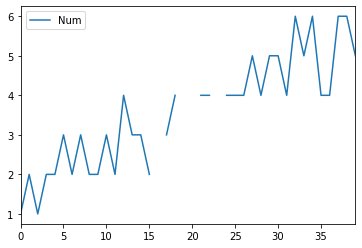

In [84]:
df_tsv.plot()#セミコロンを付けると文字を非表示にできる

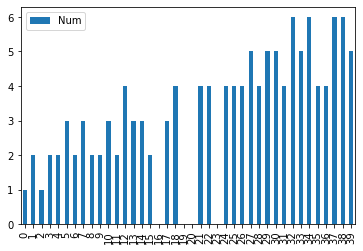

In [85]:
df_tsv.plot.bar();

In [87]:
df_tsv.isnull().sum()#欠損値をカウント

Date       0
Num        4
Product    0
dtype: int64

In [89]:
df_tsv[df_tsv.isnull().any(1)]#欠損値が含まれる行のみ表示

,Date,Num,Product
16,2017-02-08,NaN,A
19,2017-02-16,NaN,A
20,2017-02-18,NaN,A
23,2017-02-24,NaN,A


**時系列データを扱うためには、日付時刻型があった方が都合がい**

----